In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('IMDB Dataset.csv')  
df.sample(10)


,review,sentiment
7826,"""Black Water"" is one of the most tense films I...",positive
30668,Another sadistic and ultra-sleazy late 70's/ea...,negative
21518,"This film is bundled along with ""Gli fumavano ...",negative
35446,Kate Beckinsale is excellent as the manipulati...,positive
12703,"Whoa, this is one of the WORST movies I have E...",negative
27269,only if its the last thing yo do and your humo...,negative
38716,Those who dislike this film seem to think that...,positive
9730,I am an avid B-Rate horror film buff and have ...,negative
43562,This was a disgrace to the game FarCry i had m...,negative
4134,"Dieter Bohlen, Germany's notorious composer an...",negative


In [55]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Get info about dat strucure, missing data (check for null and null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#remove duplicates
df = df.drop_duplicates()
df['review'] = df['review'].str.strip()

In [58]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [59]:
len(df)


49582

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
X = df['review']  
y = df['sentiment']  

# using TF-IDF, Convert text data into numeric form
tfidf_numeric = TfidfVectorizer(max_features=5000)  # Limit vocabulary to top 5000 terms
X_tfidf_numeric_matrix = tfidf_numeric.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_numeric_matrix, y, test_size=0.2, random_state=42)

# Initialise and train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions of sentiments based on test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.88978521730362
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4939
    positive       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



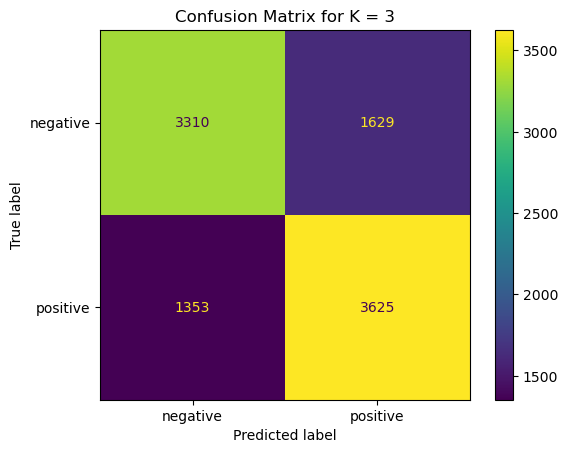

Score (test set) for K = 3: 0.70


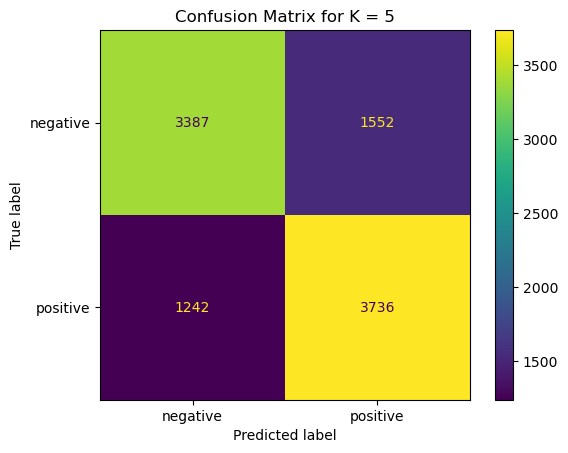

Score (test set) for K = 5: 0.72


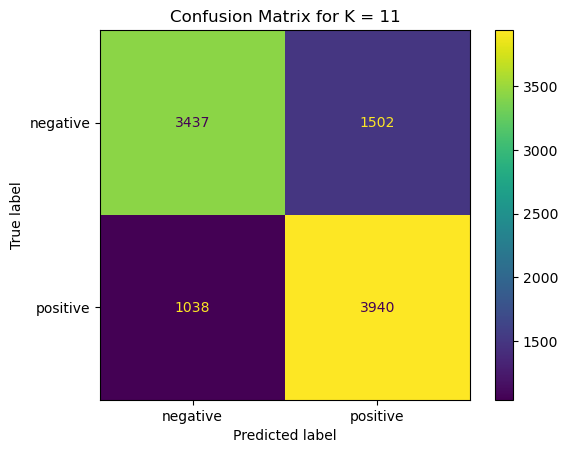

Score (test set) for K = 11: 0.74


In [85]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

# Load data
y = df["sentiment"]
X = df["review"]

# Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)  # Reduce max_features for faster computation
X_tfidf = tfidf.fit_transform(X)

# Apply dimensionality reduction
svd = TruncatedSVD(n_components=100, random_state=42)  # Reduce to 100 dimensions
X_reduced = svd.fit_transform(X_tfidf)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Loop through different values of k
for k in [3, 5, 11]:
    # Initialize the model with optimized algorithm
    clf = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree")

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Predict and calculate confusion matrix
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for K = {k}')
    plt.show()

    # Evaluate the model
    test_score = accuracy_score(y_test, y_pred)
    print(f'Score (test set) for K = {k}: {test_score:.2f}')
